In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../src")
from data_proc import *
from baselines import *
from policy import *
from simulate import *
from visualize import *

pd.options.mode.chained_assignment = None

In [2]:
DATA_PATH = "../data/warfarin.csv"  # path to raw Warfarin data file

In [3]:
def simulate_policies(simulator, policies, num_runs=3):
    """
    Simulates a list of policies, each for 'num_runs' times
    Plots the regret/T & validation accuracy curves of all policies for comparison
    
    simulator:
        WarfarinSimulator instance
    policies:
        List of Policy instances that implement reset(), choose_arm(), and update_policy()
    """
    for policy in policies:
        policy_name = policy.__class__.__name__
        reward_histories = []
        val_accuracy_histories = []
        regrets = []
        
        print("Start simulating {} for {} times".format(policy_name, num_runs))
        for i in range(num_runs):
            # Reset the policy and simulate
            policy.reset()
            simulator.simulate(policy)
            
            # Record results of this simulation run
            regrets.append(simulator.get_total_regret())
            reward_histories.append(simulator.get_reward_history())
            val_accuracy_histories.append(simulator.get_validation_history()[1])
            print("Total regret: {}".format(regrets[-1]))

        print("{} average regret: {}".format(policy_name, np.mean(regrets)))
        
        # Plot regret/T & validation accuracy curves for this policy
        val_step_history = simulator.get_validation_history()[0]
        plt.figure("regret")
        plot_incorrect_fraction(reward_histories, policy_name)
        plt.figure("val-acc")
        plot_validation_accuracy(val_step_history, val_accuracy_histories, policy_name)

    # Label the plots
    plt.figure("regret")
    plt.legend()
    plt.title("Average Fraction of Incorrect Decisions")
    plt.xlabel("t")
    plt.figure("val-acc")
    plt.legend()
    plt.title("Cross Validation Accuracy")
    plt.xlabel("t")

In [4]:
# Instantiate a Warfarin simulator
simulator = WarfarinSimulator(DATA_PATH, test_size=500, add_bias=True)

Instantiated a Warfarin Bandit simulator!
Number of features: 24
Size of training set for online learning: 5028
Size of holdout validation set: 500


Start simulating FixedDosePolicy for 3 times
Start simulation...
5028/5028 [==============================] - 0s     
Total regret: 2298
Start simulation...
5028/5028 [==============================] - 0s     
Total regret: 2310
Start simulation...
5028/5028 [==============================] - 0s     
Total regret: 2303
FixedDosePolicy average regret: 2303.6666666666665
Start simulating OraclePolicy for 3 times
Start simulation...
5028/5028 [==============================] - 13s    
Total regret: 1564
Start simulation...
5028/5028 [==============================] - 14s    
Total regret: 1574
Start simulation...
5028/5028 [==============================] - 13s    
Total regret: 1581
OraclePolicy average regret: 1573.0
Start simulating EpsilonGreedyPolicy for 3 times
Start simulation...
5028/5028 [==============================] - 4s     
Total regret: 2049
Start simulation...
5028/5028 [==============================] - 4s     
Total regret: 2068
Start simulation...
5028/5028 [==========

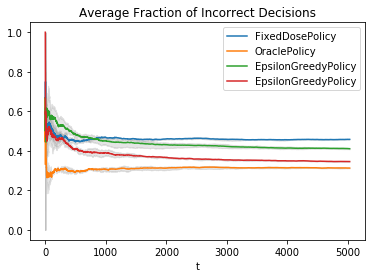

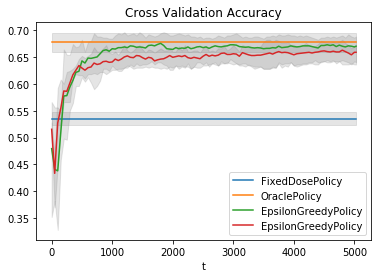

In [5]:
# Simulate three policies and plot their performance
fixed_dose = FixedDosePolicy()
oracle = OraclePolicy(DATA_PATH)
egreedy = EpsilonGreedyPolicy(simulator.p, num_arms=3, eps=0.2)
greedy = EpsilonGreedyPolicy(simulator.p, num_arms=3, eps=0)

simulate_policies(simulator, [fixed_dose, oracle, egreedy, greedy], num_runs=3)